In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from collections import Counter
import pandas as pd
import random

In [2]:
style.use('fivethirtyeight')#styling the plot

In [3]:
# simple example
dataset = {'k':[[1,2],[2,3],[3,1]],'r':[[5,6],[6,7],[8,5]]}
new_features = [4,7]

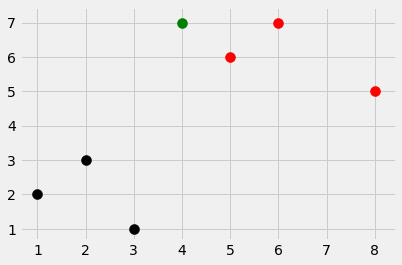

In [4]:
for i in dataset:
    for ii in dataset[i]:
        plt.scatter(ii[0],ii[1],s=100,color=i)#s: size of the dots
plt.scatter(new_features[0],new_features[1],s=100,color='g')
plt.show()

In [5]:
def k_nearest_neighbors(data,predict,k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total number of groups! you might wanna change that.')
    if k%2==0:
        warnings.warn('K cannot be an even number')
    distances = []
    for group in data: #group : class name
        for feature in data[group]:
            euc_dis = np.linalg.norm(np.array(feature)-np.array(predict)) # calculating euclidean distance
            distances.append([euc_dis,group])
    votes = []
    for d in sorted(distances)[0:k]: # adding k nearest neighbors class names to votes
        votes.append(d[1])
    vote_res = Counter(votes).most_common(1)[0][0] # getting the first most common class name in votes
    confidence = Counter(votes).most_common(1)[0][1] / k
    return vote_res,confidence

In [6]:
res = k_nearest_neighbors(dataset,new_features,3)

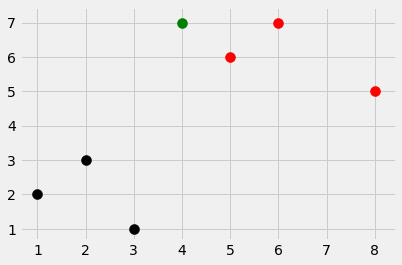

In [7]:
for i in dataset:
    for ii in dataset[i]:
        plt.scatter(ii[0],ii[1],s=100,color=i)#s: size of the dots
plt.scatter(new_features[0],new_features[1],s=100,color='g')
plt.show()

In [8]:
# breast cancer data set
dataset = pd.read_csv('breast-cancer-wisconsin.data')
dataset.replace('?',-99999,inplace=True) # dropping bad data
dataset.drop(['id'],1,inplace=True)# dropping useless features
full_data = dataset.astype(float).values.tolist() #converting everything to lists of floates
print(full_data)

[[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0], [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0], [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0], [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [8.0, 10.0, 10.0, 8.0, 7.0, 10.0, 9.0, 7.0, 1.0, 4.0], [1.0, 1.0, 1.0, 1.0, 2.0, 10.0, 3.0, 1.0, 1.0, 2.0], [2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 5.0, 2.0], [4.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 2.0], [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0], [5.0, 3.0, 3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 1.0, 4.0], [1.0, 1.0, 1.0, 1.0, 2.0, 3.0, 3.0, 1.0, 1.0, 2.0], [8.0, 7.0, 5.0, 10.0, 7.0, 9.0, 5.0, 5.0, 4.0, 4.0], [7.0, 4.0, 6.0, 4.0, 6.0, 1.0, 4.0, 3.0, 1.0, 4.0], [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0], [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0], [10.0, 7.0, 7.0, 6.0, 4.0, 10.0, 4.0, 1.0, 2.0, 4.0], [6.

In [9]:
random.shuffle(full_data)

In [10]:
#extraxting train and test samples
test_size = 0.2
train_set = {2:[],4:[]}
test_set = {2:[],4:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

In [11]:
#populating train and test samples in classes
for i in train_data:
    train_set[i[-1]].append(i[:-1]) #excluding class names
for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [17]:
#calculating accuracy and confidence
# confidence : for each prediction howmuch are we sure that our prediction is right
#that's why k cannot be an even number
correct = 0
total =0
results = []
for group in test_set:
    for data in test_set[group]:
        vote,confidence = k_nearest_neighbors(train_set,data,3)
        results.append(vote)
        if group == vote:
            correct+=1
        else:
            print('confidence:',confidence) # print the confidence of the incorrect results
        total+=1
print('results:',results)
print('Accuracy:',correct/total*100)

confidence: 1.0
confidence: 1.0
confidence: 1.0
confidence: 0.6666666666666666
confidence: 0.6666666666666666
confidence: 1.0
results: [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2]
Accuracy: 95.68345323741008
